# Theory of GUIs

## Definitions

Model: The backend code of a program (The code we have been writing so far in this course & 1405)

Graphical User Interface:  The visable aspect that lets user interact with your program.

## How to write a GUI

Your interface should be written in a class that extends "Application".  This lets that class inherit all of the behavoirs of the typical application, while letting you change what you want.

In [ ]:
public class GUIExample extends Application {
 ... 
}

For your GUI class to function, you need a main method that in turn calls only the launch() method.

In [ ]:
public class GUIExample extends Application {
  
    public static void main(String[] args){
        launch(args);
    }
}

The launch method in turn calls three methods from the Application superclass, init(), start(), and exit() in order.  To get a functioning GUI, we need to overwrite these (or at least start()) in our class.  The start method is where we put 
all the code for our GUI.  You will notice the parameter is a Stage Object.  

In [ ]:
public class GUIExample extends Application {
  
    public static void main(String[] args){
        launch(args);
    }
  
    public void start(Stage primaryStage){
        //GUI Code goes here!
    }
}

The javafx package we use for GUIs has a basic heirarchy in a given interface.  Within an application, the highest level is a Stage.  This is the window object and we dont modify any properties of the Stage.  The next level down is a Scene, which is the 
object we add compnents to and can modify directly.  Every Stage has a Scene its activly displaying.  The last level down are the components.  Generally grouped together in the form of a container, such as a Pane.  In the following code snippet
, we create a new Component (a Button) and add it to our new Container (the Pane) which is in turn added to our Scene and displayed on the Stage.

In [ ]:
public class GUIExample extends Application {
  
    public static void main(String[] args){
        launch(args);
    }
  
    public void start(Stage primaryStage){
        
        Button button1 = new Button("This is a button!");              //Creating our new Button.

        Pane pane1 = new Pane();                                       //Creating our new Pane.

        pane1.getChildren().addAll(button1);                           //Adding the Button to our Pane.

        primaryStage.setScene(new Scene(pane1));                       //Creating a new Scene that takes in our Pane, and setting to the Stage.
        primaryStage.show();                                           //Allowing the Stage to be Visible.
    }
}

We have created a fully functioning GUI!  The next section will go more in depth on how Java does some of these things.

## Components and Containers

Java groups all components together as subclasses of the Node class (this includes Pane).  All componets added to a scene are grouped together in a tree like structure called a Scene Graph.  This makes it easy for Java to add things to a scene, as it adds 
the "Root Node" and all the children nodes come with it.  In our code example, the scene graph stucture is easily identifiable. 

In [ ]:
public class GUIExample extends Application {
  
    public static void main(String[] args){
        launch(args);
    }
  
    public void start(Stage primaryStage){
        
        Button button1 = new Button("This is a button!");              //A component - Instance of Node.
                                                                       
        Pane pane1 = new Pane();                                       //Our Root Node.
                                                                       
        pane1.getChildren().addAll(button1);                           //Adds our button as a Child Node of the Pane.
                                                                       
        primaryStage.setScene(new Scene(pane1));                       
        primaryStage.show();                                           
    }
}

## Grouping Components Together

Now that we know how to use Componets and Containers, and what they really are (trees of Nodes) we can use this to our advantage.  We can create a new class that extends Pane, allowing us to create a Pane object that we can customize.

In [ ]:
public class PaneExample extends Pane {
 ... 
}

We can set up our Pane like we did in our prevoius other example and add some buttons to it.

In [ ]:
public class PaneExample extends Pane {
    public Pane(){
        Button button1 = new Button();
        Button button2 = new Button();
        Button button3 = new Button();
      
        getChildren().addAll(button1, button2, button3);
    
    }
}

Now we can edit our main GUIExample class to make use of our new Pane object!  As we can only pass 1 pane to a scene, we create an outer Pane and add our inner panes to it.

In [ ]:
public class GUIExample extends Application {
  
    public static void main(String[] args){
        launch(args);
    }
  
    public void start(Stage primaryStage){
        
        Pane outer = new Pane();                                       //Creating our outer Pane.
        
        PaneExample pane1 = new PaneExample();                         //Creating the first instance of PaneExample
        PaneExample pane1 = new PaneExample();                         //Creating the second instance of PaneExample
      
        outer.getChildren().addAll(button1);                           //Adding the 2 PaneExamples(pane objects) to our outer pane.

        primaryStage.setScene(new Scene(outer));                       //Creating a new Scene that takes in our outer Pane, and setting it to the Stage.
        primaryStage.show();                                           //Allowing the Stage to be Visible.
    }
}

Now our GUI has 2 seperate sections that both contain 3 buttons.  See if you can figure out what the Scene Graph tree looks like for this one!

## Event Handlers

The last important part of programing a GUI is interacting with the user.  This is done through the Event system.  Every time the user interacts with a GUI in any way (mouse, keyboard etc..) an Event object is created.  We can write code for our components 
called Event Handlers that detect and react to these events dynamicly.  Here is an example of an event handler on a Button, we reacts to it being pressed (an ActionEvent).

In [ ]:
Button exampleButton = new Button();
exampleButton.setOnAction(new EventHandler<ActionEvent>() {
            @Override
            public void handle(ActionEvent event) {
                //Event code goes here!
            }
});
  

We interact with the event with the Event object the method takes as a parameter.  For example, we can get the source of the Event by looking at the event.source attribute.

In [ ]:
public void handle(ActionEvent event) {
    System.out.println(event.source);                    //Print whatever object generated the event that we found.
}

# GUI Example

The following is an example program written do demonstrate all the stuff we just talked about (and some other stuff we will look at in class soon).

In [ ]:
public class Product {

    private float price;
    private String name;
    public Product(String n, float p){
        price = p;
        name = n;
    }

    public float getPrice() {
        return price;
    }
    public void setPrice(float price) {
        this.price = price;
    }
    public void setName(String name) {
        this.name = name;
    }
    public String getName() {
        return name;
    }
}

In [ ]:
import javafx.application.Application;
import javafx.beans.value.ChangeListener;
import javafx.beans.value.ObservableValue;
import javafx.collections.FXCollections;
import javafx.event.ActionEvent;
import javafx.event.EventHandler;
import javafx.scene.Scene;
import javafx.scene.control.Button;
import javafx.scene.control.Label;
import javafx.scene.control.ListView;
import javafx.scene.layout.Pane;
import javafx.scene.text.Font;
import javafx.stage.Stage;

import java.util.HashMap;
import java.util.Set;

public class App extends Application {

    String currSelection;
    String currSelCart;

    public static void main(String[] args) {
        launch(args);
    }

    @Override
    public void start(Stage primaryStage) {
        Pane p = new Pane();

        currSelection = null;

        String[] stock = new String[5];
        String[] cart = new String[5];

        HashMap products = new HashMap<String, Product>();
        products.put("Apple", new Product("Apple", 5.50f));
        products.put("Steak", new Product("Steak", 36.99f));
        products.put("Chair", new Product("Chair", 199.89f));
        products.put("TV", new Product("TV", 769.98f));
        products.put("YO-YO", new Product("YO-YO", 3.95f));

        Set<String> keys = products.keySet();
        stock = keys.toArray(new String[5]);




        Label storeTitle = new Label("   The stores current stock:");
        storeTitle.relocate(50,50);
        storeTitle.setPrefSize(200,50);
        storeTitle.setFont(new Font("SansSerif", 15));

        Label cartTitle = new Label("   Items in your cart:");
        cartTitle.relocate(450,50);
        cartTitle.setPrefSize(200,50);
        cartTitle.setFont(new Font("SansSerif", 15));

        Label totalCost = new Label("Total cost of all objects in cart: 0");
        totalCost.relocate(300,400);
        totalCost.setPrefSize(400,50);
        totalCost.setFont(new Font("SansSerif", 15));

        ListView<String> productList = new ListView<String>();
        productList.setItems(FXCollections.observableArrayList(products.keySet()));
        productList.relocate(50, 125);
        productList.setPrefSize(200, 300);

        productList.getSelectionModel().selectedItemProperty()
                .addListener(new ChangeListener<String>() {
                    public void changed(ObservableValue<? extends String> observable,
                                        String oldValue, String newValue) {
                        currSelection = productList.getSelectionModel().getSelectedItem();
                    }
                });

        ListView<String> cartList = new ListView<String>();
        cartList.relocate(450, 125);
        cartList.setPrefSize(200, 200);
        cartList.getSelectionModel().selectedItemProperty()
                .addListener(new ChangeListener<String>() {
                    public void changed(ObservableValue<? extends String> observable,
                                        String oldValue, String newValue) {
                        currSelCart = cartList.getSelectionModel().getSelectedItem();
                    }
                });

        Button add = new Button("Add to cart");
        add.relocate(290, 150);
        add.setPrefSize(120,50);
        add.setOnAction(new EventHandler<ActionEvent>() {
            @Override
            public void handle(ActionEvent event) {
                if (currSelection != null){
                    for (int i = 0; i < 5; i++) {
                        if (cart[i] == null){
                            cart[i] = currSelection;
                            cartList.setItems(FXCollections.observableArrayList(nonNull(cart)));
                            totalCost.setText("Total cost of all objects in cart: " + totalPrice(cart, products));
                            break;
                        }
                    }
                }
            }
        });

        Button remove = new Button("Remove from cart");
        remove.relocate(290, 225);
        remove.setPrefSize(120,50);
        remove.setOnAction(new EventHandler<ActionEvent>() {
            @Override
            public void handle(ActionEvent event) {
                System.out.println(currSelCart);
                if (currSelCart != null) {
                    for (int i = 0; i <cart.length; i++) {
                        if (cart[i] != null && cart[i].equals(currSelCart)) {
                            cart[i] = null;
                            cartList.setItems(FXCollections.observableArrayList(nonNull(cart)));
                            totalCost.setText("Total cost of all objects in cart: " + totalPrice(cart, products));
                            break;
                        }

                    }
                }
            }
        });

        p.getChildren().addAll(storeTitle, cartTitle, productList, cartList, add, remove, totalCost);
        primaryStage.setTitle("Walmart");
        primaryStage.setScene(new Scene(p, 700,500));
        primaryStage.show();
    }

    public String[] nonNull(String[] s){
        int count = 0;
        for (int i = 0; i <s.length; i++) {
            if (s[i] != null){
                count++;
            }
        }
        String[] out = new String[count];
        int index = 0;
        for (int i = 0; i < s.length; i++) {
            if (s[i] != null){
                out[index] = s[i];
                index++;
            }
        }
        return out;
    }
    public float totalPrice(String[] items, HashMap prods){
        float price = 0;
        for (int i = 0; i < items.length; i++) {
            if (items[i] != null){
                Product p = (Product)prods.get(items[i]);
                price += p.getPrice();
            }
        }
        return price;
    }
}


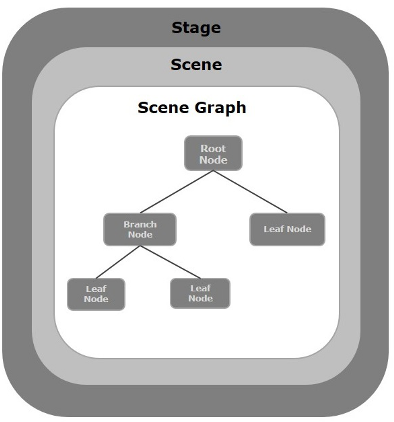

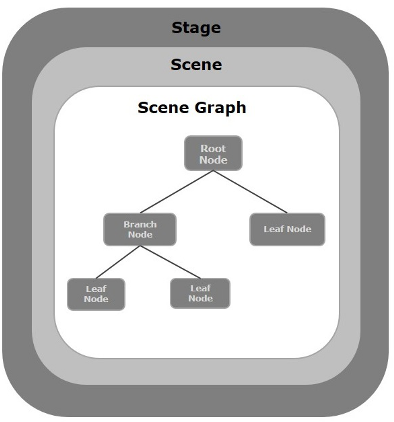